In [1]:
import numpy as np
import matplotlib.pyplot as plt

SIGNAL_LENGTH = 150
NOISE_LENGTH  = 50

base_signal = np.random.randn(1, SIGNAL_LENGTH)

In [2]:
former_noise = np.random.randn(1, NOISE_LENGTH)
latter_noise = np.random.randn(1, NOISE_LENGTH)

<Figure size 432x288 with 0 Axes>

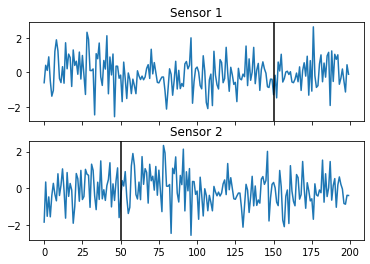

In [3]:
sensor_1 = np.concatenate((base_signal, latter_noise), axis=None)
sensor_2 = np.concatenate((former_noise, base_signal), axis=None)

plt.figure()
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)

ax1.plot(sensor_1)
ax1.set_title("Sensor 1")
ax1.axvline(x=SIGNAL_LENGTH, color="black")


ax2.plot(sensor_2)
ax2.set_title("Sensor 2")
ax2.axvline(x=NOISE_LENGTH, color="black")

<Figure size 432x288 with 0 Axes>

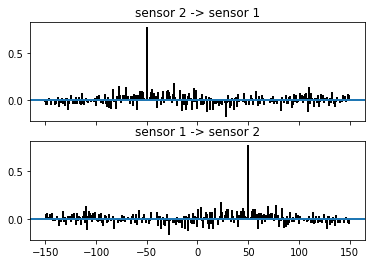

Matching Point: 50


In [4]:
plt.figure()
fig, [ax1, ax2] = plt.subplots(2,1, sharex=True)

ax1.xcorr(sensor_1, sensor_2, usevlines=True, maxlags=150, normed=True, lw=2)
ax1.set_title("sensor 2 -> sensor 1")

xcorr = ax2.xcorr(sensor_2, sensor_1, usevlines=True, maxlags=150, normed=True, lw=2)
ax2.set_title("sensor 1 -> sensor 2")

plt.show()

moving_index = xcorr[0][xcorr[1] == max(xcorr[1])][0]

print(f"Matching Point: {moving_index}")

<Figure size 432x288 with 0 Axes>

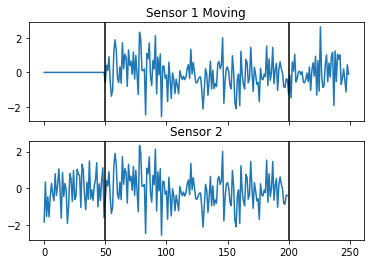

In [5]:
sensor_1_move = np.concatenate((np.zeros(moving_index, ), sensor_1), axis=None)

plt.figure()
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)

ax1.plot(sensor_1_move)
ax1.set_title("Sensor 1 Moving")
ax1.axvline(x=SIGNAL_LENGTH + moving_index, color="black")
ax1.axvline(x=moving_index, color="black")

ax2.plot(sensor_2)
ax2.set_title("Sensor 2")
ax2.axvline(x=NOISE_LENGTH, color="black")
ax2.axvline(x=NOISE_LENGTH + SIGNAL_LENGTH, color="black")